In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0)

In [4]:
X

array([[ 0.09119247, -1.53755213],
       [-1.24891511, -0.65145322],
       [-0.0717622 , -0.14337607],
       ...,
       [ 0.87053254,  0.08791334],
       [ 0.71581369, -1.00576073],
       [ 1.95260578,  1.02746135]])

In [5]:
y

array([-6.07791224e+01, -1.07951738e+02, -1.09897950e+01, -2.36316299e+00,
       -2.07647965e+01, -9.35147827e+01, -4.76201047e+01, -2.15966414e+01,
        2.52191553e+01, -1.63424219e+02,  1.71731228e+01,  6.98542760e+01,
        5.33856589e+01, -1.64538233e+02, -1.39782339e+02,  1.29152031e+02,
        5.84623360e+00,  1.01665408e+02, -9.28711632e+01,  4.77023023e+01,
       -4.39783197e+01, -9.45292455e+01,  6.25782367e+01, -5.14050982e+01,
       -1.44008989e+02, -3.78126181e+01, -4.83857909e+01,  1.03076553e+02,
        1.70498304e+02, -7.30519560e+01, -4.00220210e+01, -2.37562546e+01,
        1.06488600e+02, -1.03422378e+02, -7.73722943e+01, -9.37460005e+00,
       -1.22634305e+02,  1.48563681e+01,  5.46233274e+01, -5.00518618e+00,
        2.32833838e+01,  1.20392207e+02, -5.72882533e+01,  1.07998458e+02,
        8.60425423e+01,  1.89891453e+01,  1.04302951e+02,  9.78444519e+01,
       -9.69168647e+00,  1.38185473e+01,  1.64049775e+02, -2.32541280e+01,
       -6.94266819e+01, -

In [6]:
pd.DataFrame(X)[0]

0      0.091192
1     -1.248915
2     -0.071762
3      0.017893
4      0.986786
         ...   
995   -2.134594
996    1.135339
997    0.870533
998    0.715814
999    1.952606
Name: 0, Length: 1000, dtype: float64

<AxesSubplot:xlabel='0', ylabel='1'>

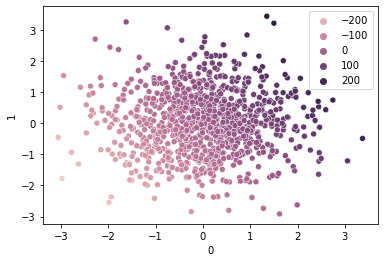

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=10)

In [9]:
from sklearn.svm import SVR

In [10]:
svr = SVR(kernel='linear')

In [11]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[65.72652859, 44.63354455]])

In [13]:
## Prediction
y_pred = svr.predict(X_test)

In [14]:
y_pred

array([-175.72282581,  -80.83608305,   -7.84227452,  -73.29485152,
         51.06598506,  122.71811228,   78.27801742,   87.2263272 ,
         74.59952539,  -29.10052638,  -26.16833861,   59.64160586,
        -51.93935227, -135.59625099,   13.26553284,  -37.48482437,
         -2.21677979,  -32.1146505 ,  -87.47182851,  -87.41708846,
        -83.14721235,  -15.87610106,  -43.64142559,   -6.6722515 ,
        145.00090806,    6.67160195,  -35.99173654,  -18.18413379,
         -3.60181858,    4.07502215, -118.10336526,   35.22861851,
        -21.10679232,  122.56847363,   -5.65620792, -161.55451784,
         25.2281955 ,  -47.20284429,   81.92152751,  -43.00823297,
       -105.21685486,  -47.34383479,  -90.52572287,  -87.08481875,
       -159.80870822, -105.30845712,  -25.56291987,  -56.47706425,
         62.85945063,   96.58446928,  101.97939357,  -59.47406847,
         68.31321666,  -38.34830328,   -4.99486972,  -13.47119751,
         -6.41860002,   58.15839872,  -64.76135659,   62.19288

In [15]:
from sklearn.metrics import r2_score

In [16]:
print(r2_score(y_test, y_pred))

0.9983087491819513


#### Hyperparametere Tuning With SVR

In [17]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [18]:
grid = GridSearchCV(SVR(), param_grid=param_grid, refit=True, cv = 5, verbose=3)

In [19]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.847 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.838 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.839 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.835 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.831 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.847 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.838 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.839 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.835 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.831 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

[CV 3/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.998 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.998 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsi

[CV 2/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.998 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.998 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.998 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.998 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.998 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.998 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.3, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.3, gamma=1, kernel=linear;, score=0.998 total time

[CV 2/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.998 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.998 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.998 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.998 total tim

[CV 1/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.998 total time=   0.3s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.998 total time=   0.3s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.4s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.998 total time=   0.3s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.998 total time=   0.3s


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [21]:
# prediction
y_pred4 = grid.predict(X_test)
print(r2_score(y_test, y_pred4))

0.9982956961571046


In [ ]:
sss